### Multi-Layer Perceptron in Keras

Using the 'Wine Quality' datasets from UCI Machine Learning Repository<br>
Following Karlijn Willems' DataCamp Tutorial: https://www.datacamp.com/community/tutorials/deep-learning-python

In [21]:
#%% Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # To check correlations during exploratory analysis
from sklearn.model_selection import train_test_split # To split data into train/test
from sklearn.preprocessing import StandardScaler # To standardize data
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

In [2]:
#%% Load Data
red = pd.read_csv(r"C:\Users\Avik\Documents\PracticeAndReview\datasets\redWine.csv", sep=';')
white = pd.read_csv(r"C:\Users\Avik\Documents\PracticeAndReview\datasets\whiteWine.csv", sep = ';')

In [7]:
#%% Explore Data
#print(white.info())
#print(red.info())
#red.head()
#red.tail()
#red.sample(5)
white.describe(include ='all')
#pd.isnull(red).values.any()
# if nans do appear, use .isnull().sum().sum() to check how many

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


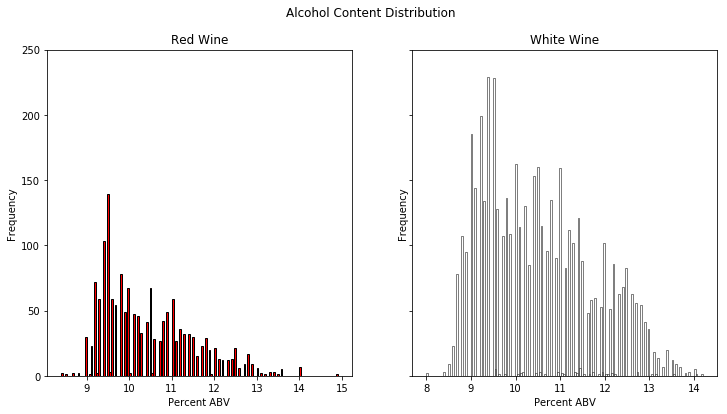

(array([ 37, 515, 323, 257, 232, 119,  87,  21,   7,   1], dtype=int64),
 array([  8.4 ,   9.05,   9.7 ,  10.35,  11.  ,  11.65,  12.3 ,  12.95,
         13.6 ,  14.25,  14.9 ]))

In [8]:
#%% Visualze Alcohol
fig, ax = plt.subplots(1,2, sharey=True, figsize = (12,6))
ax[0].hist(red.alcohol, 150, facecolor = 'red', ec = 'black')
ax[1].hist(white.alcohol, 150, facecolor = 'white', label = "White Wine", 
  ec = 'black', lw = .5)
ax[0].set_ylim([0, 250])
ax[0].set_xlabel("Percent ABV")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Percent ABV")
ax[1].set_ylabel("Frequency")
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
fig.suptitle("Alcohol Content Distribution")
plt.show()

np.histogram(red.alcohol)

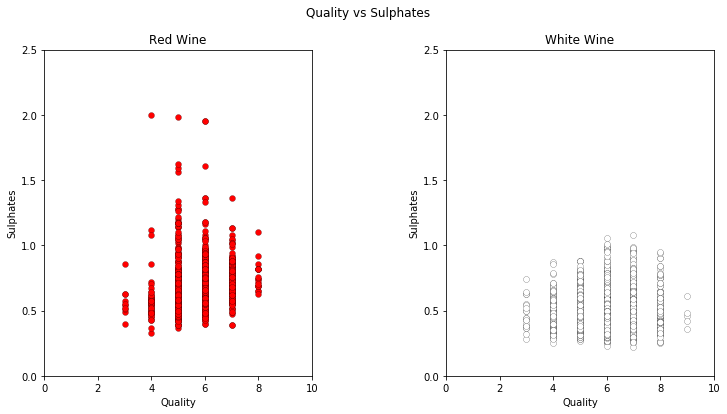

In [9]:
#%% Are Sulphates correlated with quality?
fig,ax = plt.subplots(1,2, figsize = (12,6))
ax[0].scatter(red.quality, red.sulphates, color='r', edgecolor = 'black', lw=.2)
ax[1].scatter(white.quality, white.sulphates, color='w', edgecolor = 'black', lw=.2)
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlim([0, 10])
ax[1].set_xlim([0, 10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0, 2.5])
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates")
ax[1].set_ylabel("Sulphates")
fig.suptitle("Quality vs Sulphates")
fig.subplots_adjust(wspace=0.5)
plt.show()

In [10]:
#%% Preprocess Data for Neural Net
red['color'] = 1
white['color'] = 0
wines = red.append(white, ignore_index = True)

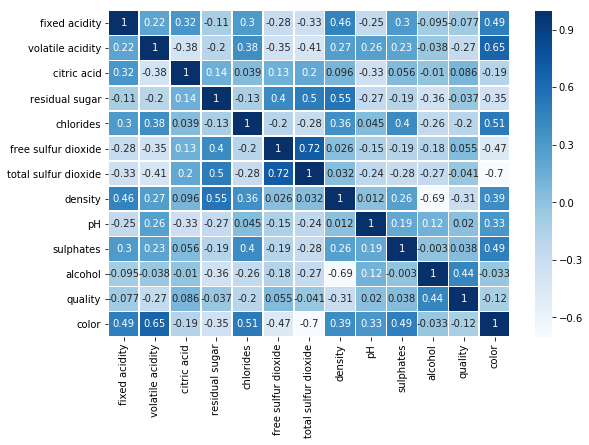

In [15]:
#%% Check for Correlations
corr = wines.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax, cmap = 'Blues')
plt.show()

In [18]:
#%% Split into Training / Test data
X = wines.iloc[:,0:11]
y = np.ravel(wines.color) # Flatten into 'simple' array
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = .33, random_state = 42)

#%% Standardizing Data
scaler = StandardScaler().fit(xTrain)
xTrain = scaler.transform(xTrain)
xTest = scaler.transform(xTest)

In [35]:
#%% Keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(11,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(xTrain, yTrain,epochs=20, batch_size=1, verbose=1)

Epoch 1/20
4352/4352 [==============================] - 4s 966us/step - loss: 0.0975 - acc: 0.9676
Epoch 2/20
4352/4352 [==============================] - 4s 868us/step - loss: 0.0233 - acc: 0.9952
Epoch 3/20
4352/4352 [==============================] - 4s 889us/step - loss: 0.0198 - acc: 0.9954
Epoch 4/20
4352/4352 [==============================] - 4s 804us/step - loss: 0.0175 - acc: 0.9968
Epoch 5/20
4352/4352 [==============================] - 3s 789us/step - loss: 0.0163 - acc: 0.9970 1s - l
Epoch 6/20
4352/4352 [==============================] - 4s 809us/step - loss: 0.0143 - acc: 0.9975
Epoch 7/20
4352/4352 [==============================] - 4s 861us/step - loss: 0.0139 - acc: 0.9975 0s - loss: 0.01
Epoch 8/20
4352/4352 [==============================] - 4s 841us/step - loss: 0.0131 - acc: 0.9977
Epoch 9/20
4352/4352 [==============================] - 4s 813us/step - loss: 0.0134 - acc: 0.9972
Epoch 10/20
4352/4352 [==============================] - 4s 842us/step - loss: 0.0126 

In [38]:
#%% Evaluating Model
yPredicted = (model.predict(xTest)).round()

In [39]:
# Calculate loss on some iput data
model.evaluate(xTest, yTest, verbose=1)

# Results are loss, accuracy

2145/2145 [==============================] - 0s 19us/step


[0.026334494367395194, 0.99533799533799538]

In [40]:
# Check True/False Negative/Positive
confusion_matrix(yTest, yPredicted)

array([[1587,    1],
       [   9,  548]], dtype=int64)

In [41]:
# Ability of the classifer to correctly label negatives
precision_score(yTest, yPredicted)

0.99817850637522765

In [42]:
# Ability for classifier to find all positive samples
recall_score(yTest, yPredicted)

0.98384201077199285

In [43]:
# Weighted avg of the above
f1_score(yTest, yPredicted)

0.99095840867992768

In [44]:
# Expresses inter-annotator agreement
cohen_kappa_score(yTest, yPredicted)

0.9878179265599869